# Melody variants in the full dataset

Cantus is a manuscript index, containing transcriptions of chants from various sources. Some chants occur multiple times in the database, be it with slight differences.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys
sys.path.append('../')
from src.generate_data import load_chants
from src.volpiano import *

In [3]:
resp_train_full = pd.read_csv('../data/run-0/responsory/full/train-chants.csv')
resp_test_full = pd.read_csv('../data/run-0/responsory/full/test-chants.csv')
anti_train_full = pd.read_csv('../data/run-0/antiphon/full/train-chants.csv')
anti_test_full = pd.read_csv('../data/run-0/antiphon/full/test-chants.csv')

resp_train_subset = pd.read_csv('../data/run-0/responsory/subset/train-chants.csv')
resp_test_subset = pd.read_csv('../data/run-0/responsory/subset/test-chants.csv')
anti_train_subset = pd.read_csv('../data/run-0/antiphon/subset/train-chants.csv')
anti_test_subset = pd.read_csv('../data/run-0/antiphon/subset/test-chants.csv')

In [4]:
id_counts = pd.value_counts(resp_train_full.cantus_id)

## A heatmap-like view

Every note has a different color (or more precisely, every volpiano character)

In [5]:
chars = list(volpiano_characters())
np.random.seed(0)
np.random.shuffle(chars)

def get_char_table(data, start=0, end=100):
    indices = []
    for volpiano in data:
        volpiano = volpiano.replace('-', '')
        char_idx = [chars.index(char) for char in volpiano]
        if len(char_idx) < end:
            char_idx.extend([np.nan for i in range(end-len(char_idx))])
        indices.append(char_idx[start:end])
    return np.asarray(indices)

In [6]:
def show_char_table(chants, cantus_id, **kwargs):
    table = get_char_table(chants['volpiano'])
    plt.figure(figsize=(10,3))
    plt.imshow(table, cmap='tab20')
    plt.title(f'First 100 notes of the {len(table)} chants with Cantus ID {cantus_id}', 
          x=0, ha='left', fontweight='bold', fontfamily='Arial')
    plt.tight_layout()

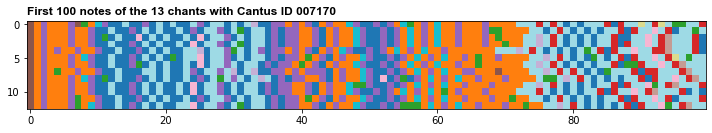

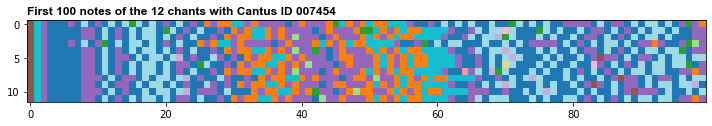

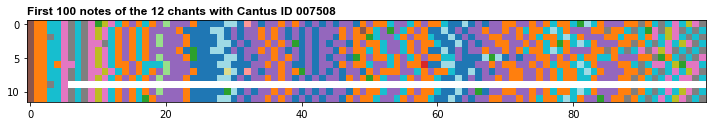

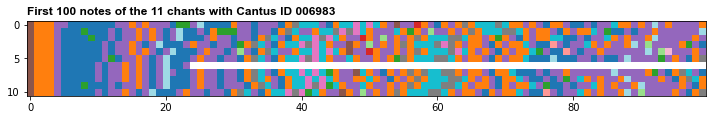

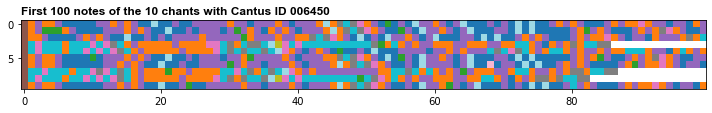

In [7]:
for i in range(5):
    chants = resp_train_full.query(f'cantus_id=="{id_counts.index[i]}"')
    show_char_table(chants, id_counts.index[i])
    plt.tight_layout()
    plt.savefig(f'../figures/figS11/figS11-melody-variants-{i}.pdf')

## And a random comparison...

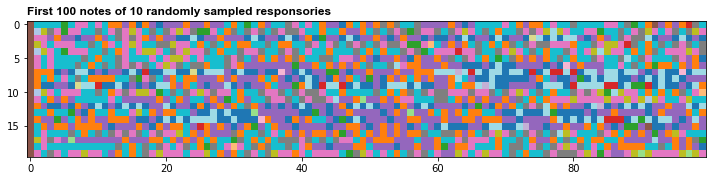

In [8]:
is_long = resp_train_full['volpiano'].str.replace('-', '').map(len) > 100
chants = resp_train_full[is_long].sample(20)
show_char_table(chants, '')
plt.title('First 100 notes of 10 randomly sampled responsories',
      x=0, ha='left', fontweight='bold', fontfamily='Arial');
plt.savefig('../figures/figS11/figS11-melody-variants-random.pdf')

## Measure total number of possibly duplicated notes

So how serious is this problem really? These are overestimates, since the same cantus id might have chants in various modes. In the subset we allow one chant of each mode, that's why those are nonzero.

In [9]:
id_counts = pd.value_counts(resp_train_subset.cantus_id)

In [10]:
def report_duplication(id_counts):
    duplicated_cantus_ids = id_counts[id_counts > 1].index
    n_duplicated_ids = len(duplicated_cantus_ids)
    n_total_ids = resp_train_full['cantus_id'].unique().shape[0]
    ratio = n_duplicated_ids / n_total_ids 
    print(f'<{ratio:.2%} of the cantus IDs have 2 or more chants')
    
    is_duplicated = resp_train_full['cantus_id'].isin(duplicated_cantus_ids)
    non_duplicated_notes = resp_train_full[is_duplicated == False].volpiano.str.replace('-','').map(len).sum()
    total_notes = resp_train_full.volpiano.str.replace('-', '').map(len).sum()
    ratio = non_duplicated_notes / total_notes
    print(f'<{1-ratio:.2%} of the notes is possibly nearly duplicated')

In [11]:
print('Full dataset')
id_counts = pd.value_counts(resp_train_full.cantus_id)
report_duplication(id_counts)

Full dataset
<67.82% of the cantus IDs have 2 or more chants
<90.76% of the notes is possibly nearly duplicated


In [12]:
print('Subset')
id_counts = pd.value_counts(resp_train_subset.cantus_id)
report_duplication(id_counts)

Subset
<5.82% of the cantus IDs have 2 or more chants
<7.56% of the notes is possibly nearly duplicated
